# EDA 

### Loading the data

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import reportlab

In [169]:
#Setting the destination folders
figures_folder_path = 'E:/PROJECT/Global-EV-data-portfolio/L1-DATA-ANALYSIS-USING-PYTHON/outputs/figures/'
if not os.path.exists(figures_folder_path):
    os.makedirs(figures_folder_path)

reports_folder_path = 'E:/PROJECT/Global-EV-data-portfolio/L1-DATA-ANALYSIS-USING-PYTHON/outputs/reports/'
if not os.path.exists(reports_folder_path):
    os.makedirs(reports_folder_path)



### Setting the style

In [170]:
pd.set_option('display.max_columns',20)
pd.set_option('display.max_rows',200)
sns.set_style('whitegrid')
%matplotlib inline

### Load the data

In [171]:
df=pd.read_csv('../data/raw/IEA Global EV Data 2024.csv', header=0)
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12654 entries, 0 to 12653
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      12654 non-null  object 
 1   category    12654 non-null  object 
 2   parameter   12654 non-null  object 
 3   mode        12654 non-null  object 
 4   powertrain  12654 non-null  object 
 5   year        12654 non-null  int64  
 6   unit        12654 non-null  object 
 7   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 791.0+ KB


,region,category,parameter,mode,powertrain,year,unit,value
count,12654,12654,12654,12654,12654,12654.000000,12654,1.265400e+04
unique,54,3,8,5,6,NaN,6,NaN
top,World,Historical,EV stock,Cars,EV,NaN,Vehicles,NaN
freq,1250,9174,3470,4706,4894,NaN,6842,NaN
mean,NaN,NaN,NaN,NaN,NaN,2019.822112,NaN,4.273742e+05
std,NaN,NaN,NaN,NaN,NaN,5.476494,NaN,6.860498e+06
min,NaN,NaN,NaN,NaN,NaN,2010.000000,NaN,1.200000e-06
25%,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,2.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,1.300000e+02
75%,NaN,NaN,NaN,NaN,NaN,2022.000000,NaN,5.500000e+03


### Data Cleaning

In [172]:
#Print the sum of missing values in each column
df.isnull().sum().sort_values(ascending=False)

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [173]:
#Print and drop the duplicate values
df[df.duplicated()]
df=df.drop_duplicates() #if exists


In [174]:
df.dtypes

region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

In [175]:
df.head(10)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.00000
6,Australia,Historical,EV sales share,Cars,EV,2012,percent,0.03000
7,Australia,Historical,EV stock share,Cars,EV,2012,percent,0.00240
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.00000
9,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80.00000


In [177]:
#Define all data types
df['region']=df['region'].astype('object')
df['category']=df['category'].astype('category')
df['parameter']=df['parameter'].astype('category')
df['mode']=df['mode'].astype('category')
df['powertrain']=df['powertrain'].astype('category')
df['year']=pd.to_datetime(df['year'],format='%Y').dt.year
df['unit']=df['unit'].astype('category')
df['value']=df['value'].astype('float')
df.to_csv('E:/PROJECT/Global-EV-data-portfolio/L1-DATA-ANALYSIS-USING-PYTHON/data/processed/cleaned_data.csv', index=False)


### Prepare data to visualize

In [146]:
#Vehicle sales by Region
reqcols=df[['region','year','unit','value','parameter']]
reqcols=reqcols[(reqcols['unit'] == 'Vehicles') & (reqcols['parameter'] == 'EV sales') & (reqcols['region'] != 'World')]
vsbr=reqcols.groupby(['region','year'])
vsbr=vsbr[['value']].agg('sum')
vsbr=vsbr.sort_values(['region','year'])

In [147]:
#Vehicle powertrain share
reqcols=df[df['category']=='Historical']
reqcols=df[['powertrain','value']]
vps=reqcols.groupby(['powertrain'],observed=True)
vps=vps[['value']].agg('sum')

In [148]:
#Vehicle powertrain over years
reqcols=df[df['category']=='Historical']
reqcols=df[['region','year','unit','value','parameter','powertrain']]
reqcols=reqcols[(reqcols['region'] != 'World')]
vpoy=reqcols.groupby(['powertrain','year'], observed=True)
vpoy=vpoy[['value']].agg('sum').reset_index()
vpoy=vpoy.sort_values(['powertrain','year'])

In [149]:
#Projection-STEPS of EVs
reqcols=df[df['category']=='Projection-STEPS']
reqcols=df[['region','year','unit','value','parameter','powertrain','mode']]
reqcols=reqcols[(reqcols['region'] != 'World') & (reqcols['parameter']=='EV sales')]
POE = reqcols.groupby(['mode', 'powertrain', 'year'], observed=True)['value'].agg('sum').reset_index()

In [150]:
# Share of projection-STEPS of EVs
reqcols=df[df['category']=='Projection-STEPS']
reqcols=df[['powertrain','value']]
SPOE=reqcols.groupby(['powertrain'],observed=True)
SPOE=SPOE[['value']].agg('sum')

In [151]:
#Projection of Global Electricity demand of EVs
reqcols=df[df['category']=='Projection-STEPS']
reqcols=reqcols[reqcols['parameter']=='Electricity demand']
POED=reqcols[['region','year','value']]
POED=POED.groupby(['region','year']).agg('sum').reset_index()

### Visualization

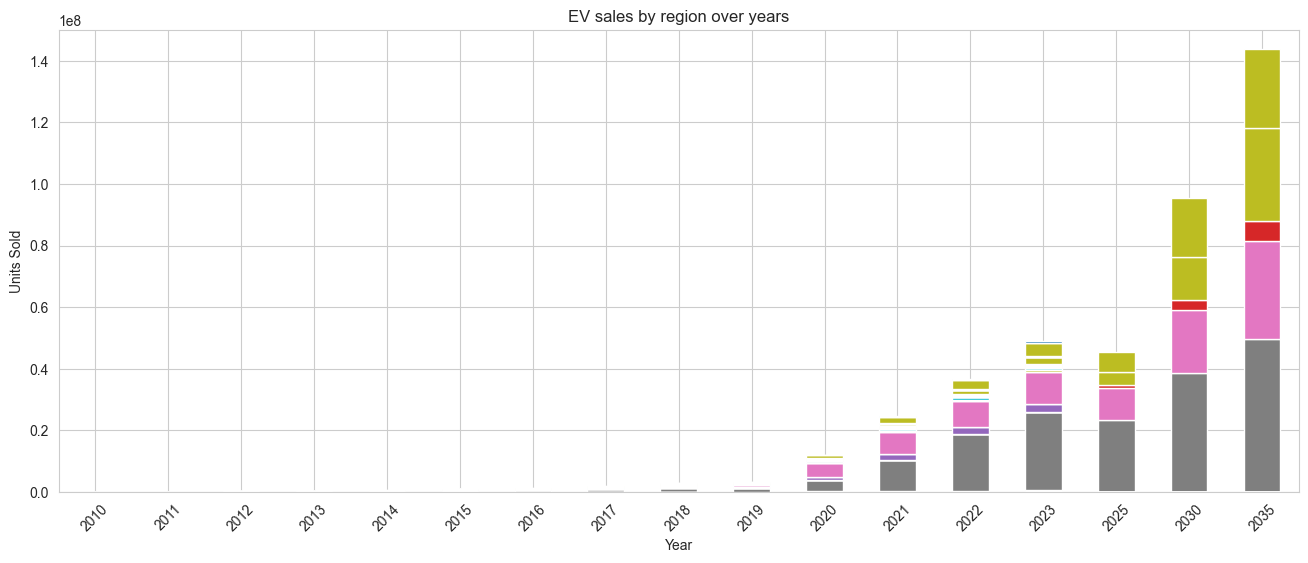

In [152]:
#Vehicle sales by Region
plotdata=vsbr.reset_index().pivot(index='year',values='value',columns='region')
plot=plotdata.plot(kind='bar',stacked=True, legend=False, figsize=(16,6),ylim=(0,150000000))
plt.xlabel('Year')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.title('EV sales by region over years')
file_path = os.path.join(figures_folder_path, 'EV sales by region over years.png')
plt.savefig(file_path)


##### China has been the largest EV market, contributing more than 50% of global EV sales by 2023.

Europe shows strong adoption post-2017, driven by policy support.

North America lags behind China & Europe but still shows steady growth.

Emerging markets (India, Brazil, etc.) have small but accelerating adoption.

Takeaway: EV growth is unevenly distributed, with China and Europe leading global adoption.

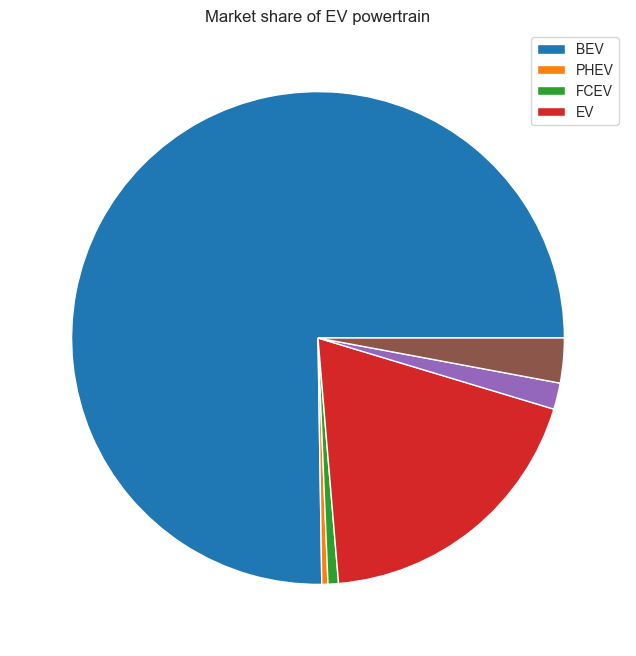

In [153]:
#Vehicle powertrain share
plotdata=vps['value'].plot(kind='pie', labels=None, figsize=(12,8))
plt.ylabel(None)
plt.title('Market share of EV powertrain')
labels=['BEV', 'PHEV', 'FCEV', 'EV']
plt.legend(loc='best', labels=labels)
file_path = os.path.join(figures_folder_path, 'Market share of EV powertrain.png')
plt.savefig(file_path)

##### Battery Electric Vehicles (BEVs) dominate the EV landscape (~70–80% of sales).

Plug-in Hybrid EVs (PHEVs) have a noticeable but smaller share.

Fuel Cell EVs (FCEVs) remain negligible.

Takeaway: The market is consolidating towards BEVs as the primary technology.

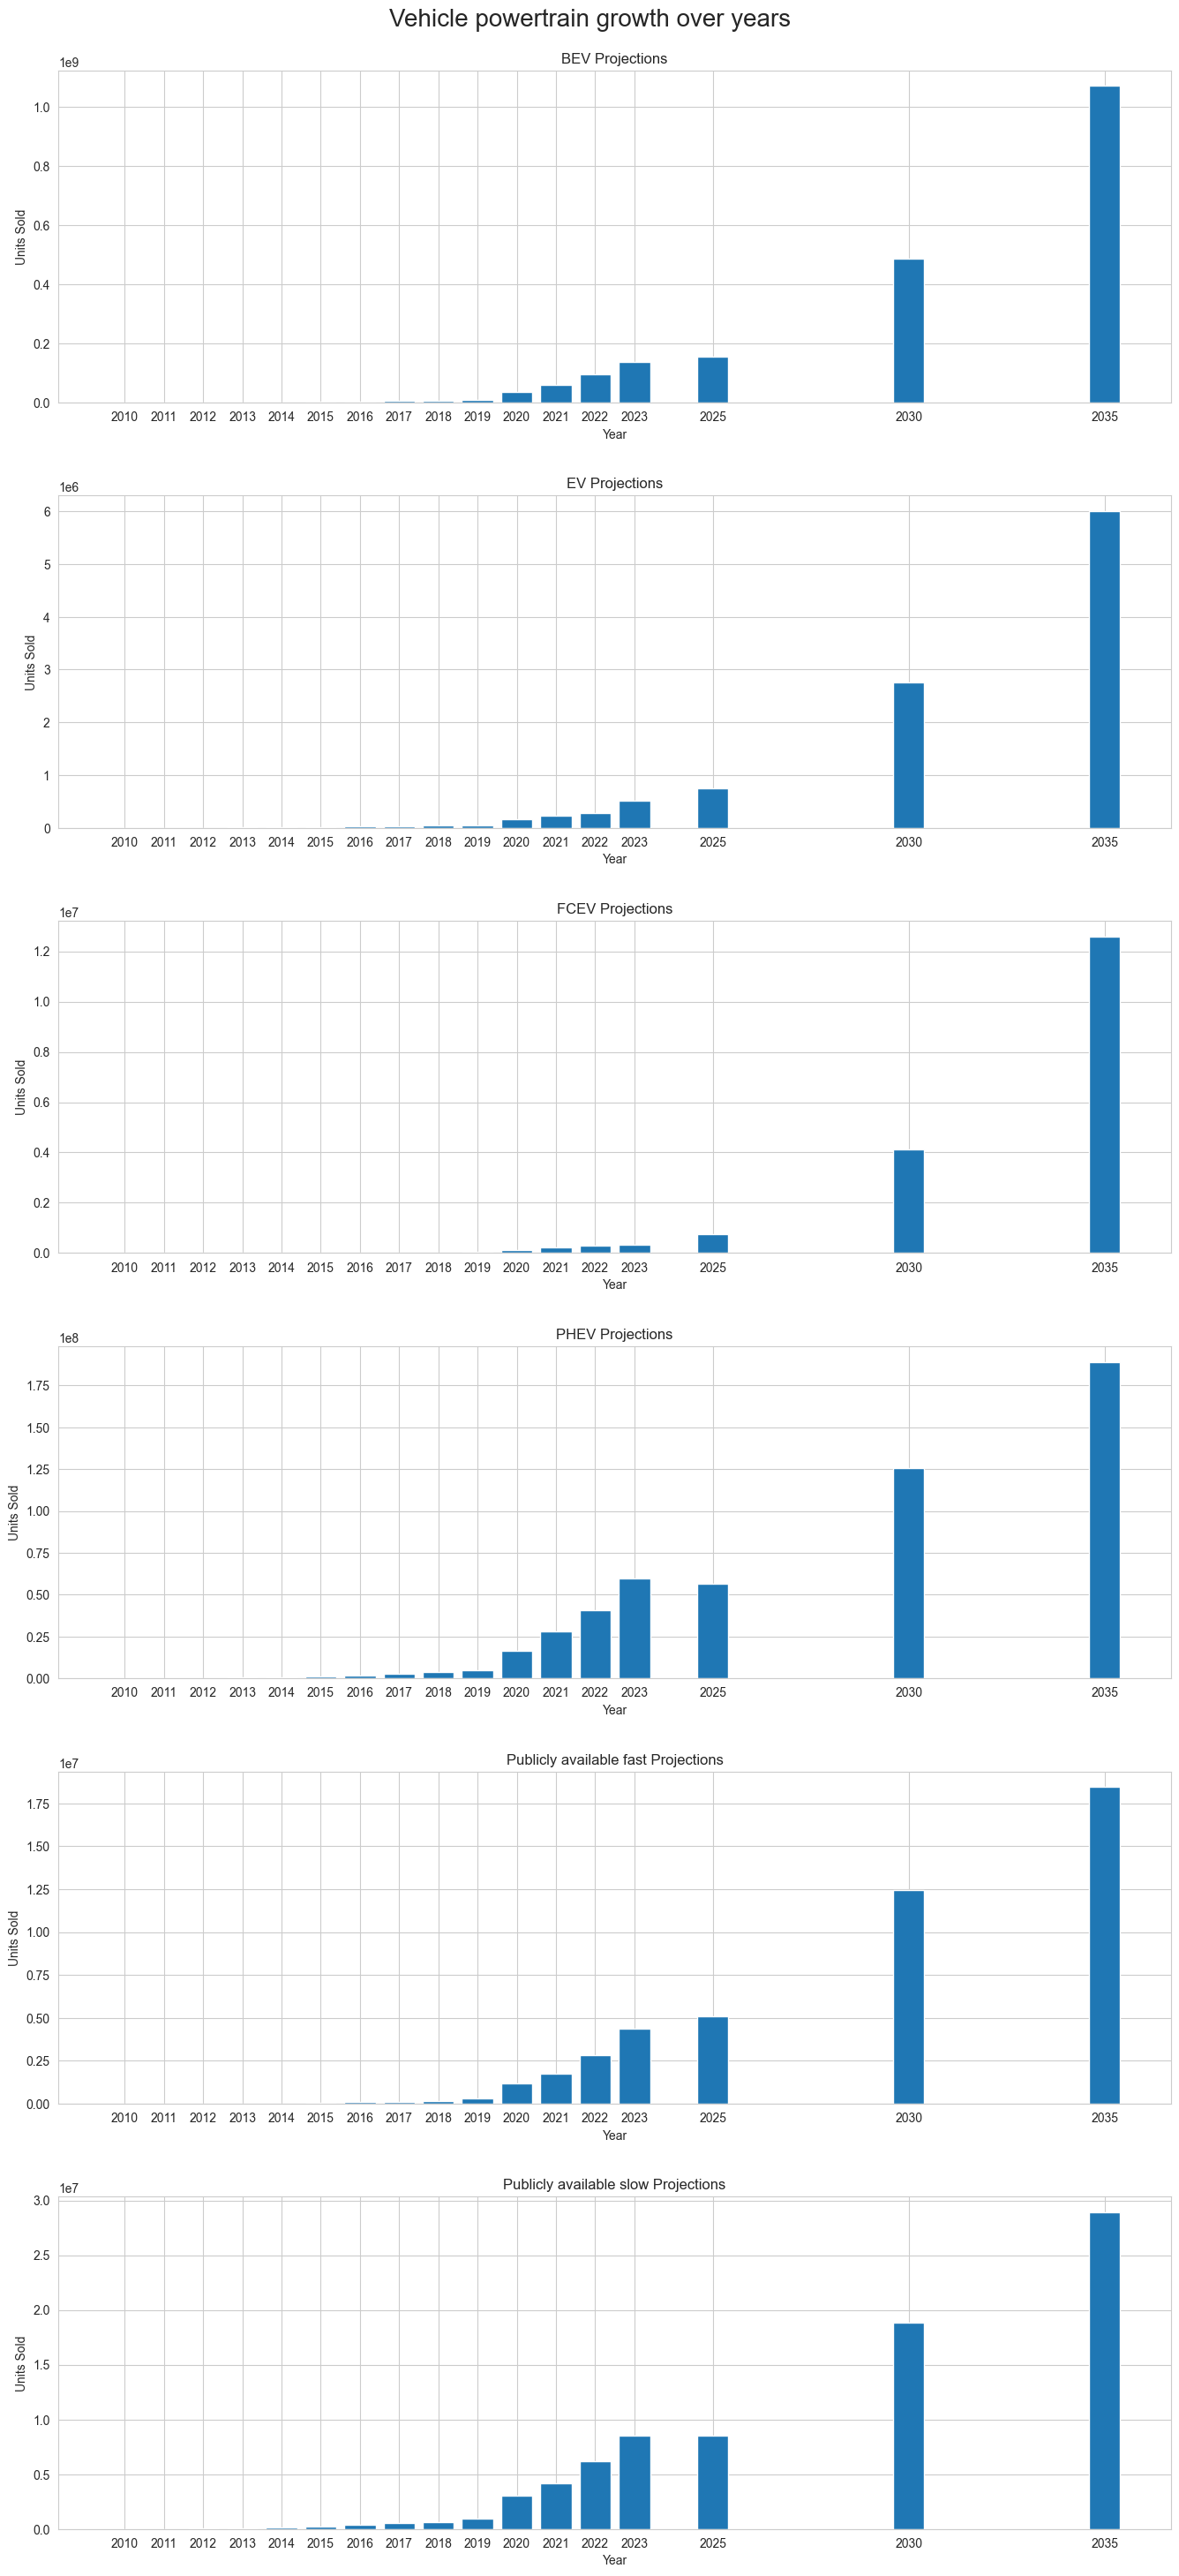

In [154]:
#Vehicle powertrain over years
plotdata=vpoy.reset_index().pivot(index='year',values='value',columns='powertrain')
powertrains=vpoy['powertrain'].unique()
fig,axes=plt.subplots(nrows=len(powertrains), figsize=(14, 5*len(powertrains)))
fig.suptitle('Vehicle powertrain growth over years', fontsize=20)
for index, powertrains in enumerate(powertrains):
    ax=axes[index]
    ax.bar(plotdata.index, plotdata[powertrains])
    ax.set_xlabel('Year')
    ax.set_ylabel('Units Sold')
    ax.set_xticks(plotdata.index)
    ax.set_title(f'{powertrains} Projections')
plt.tight_layout(pad=3)
file_path = os.path.join(figures_folder_path, 'Vehicle powertrain growth over years.png')
plt.savefig(file_path)

##### BEVs show exponential growth post-2015.

PHEVs peaked around 2018–2020 but show slower growth.

FCEVs adoption is flat, with limited scaling.

Takeaway: Policy + technology trends favor BEVs long-term, while PHEVs may serve as a transitional technology.

[<Axes: > <Axes: > <Axes: > <Axes: >]


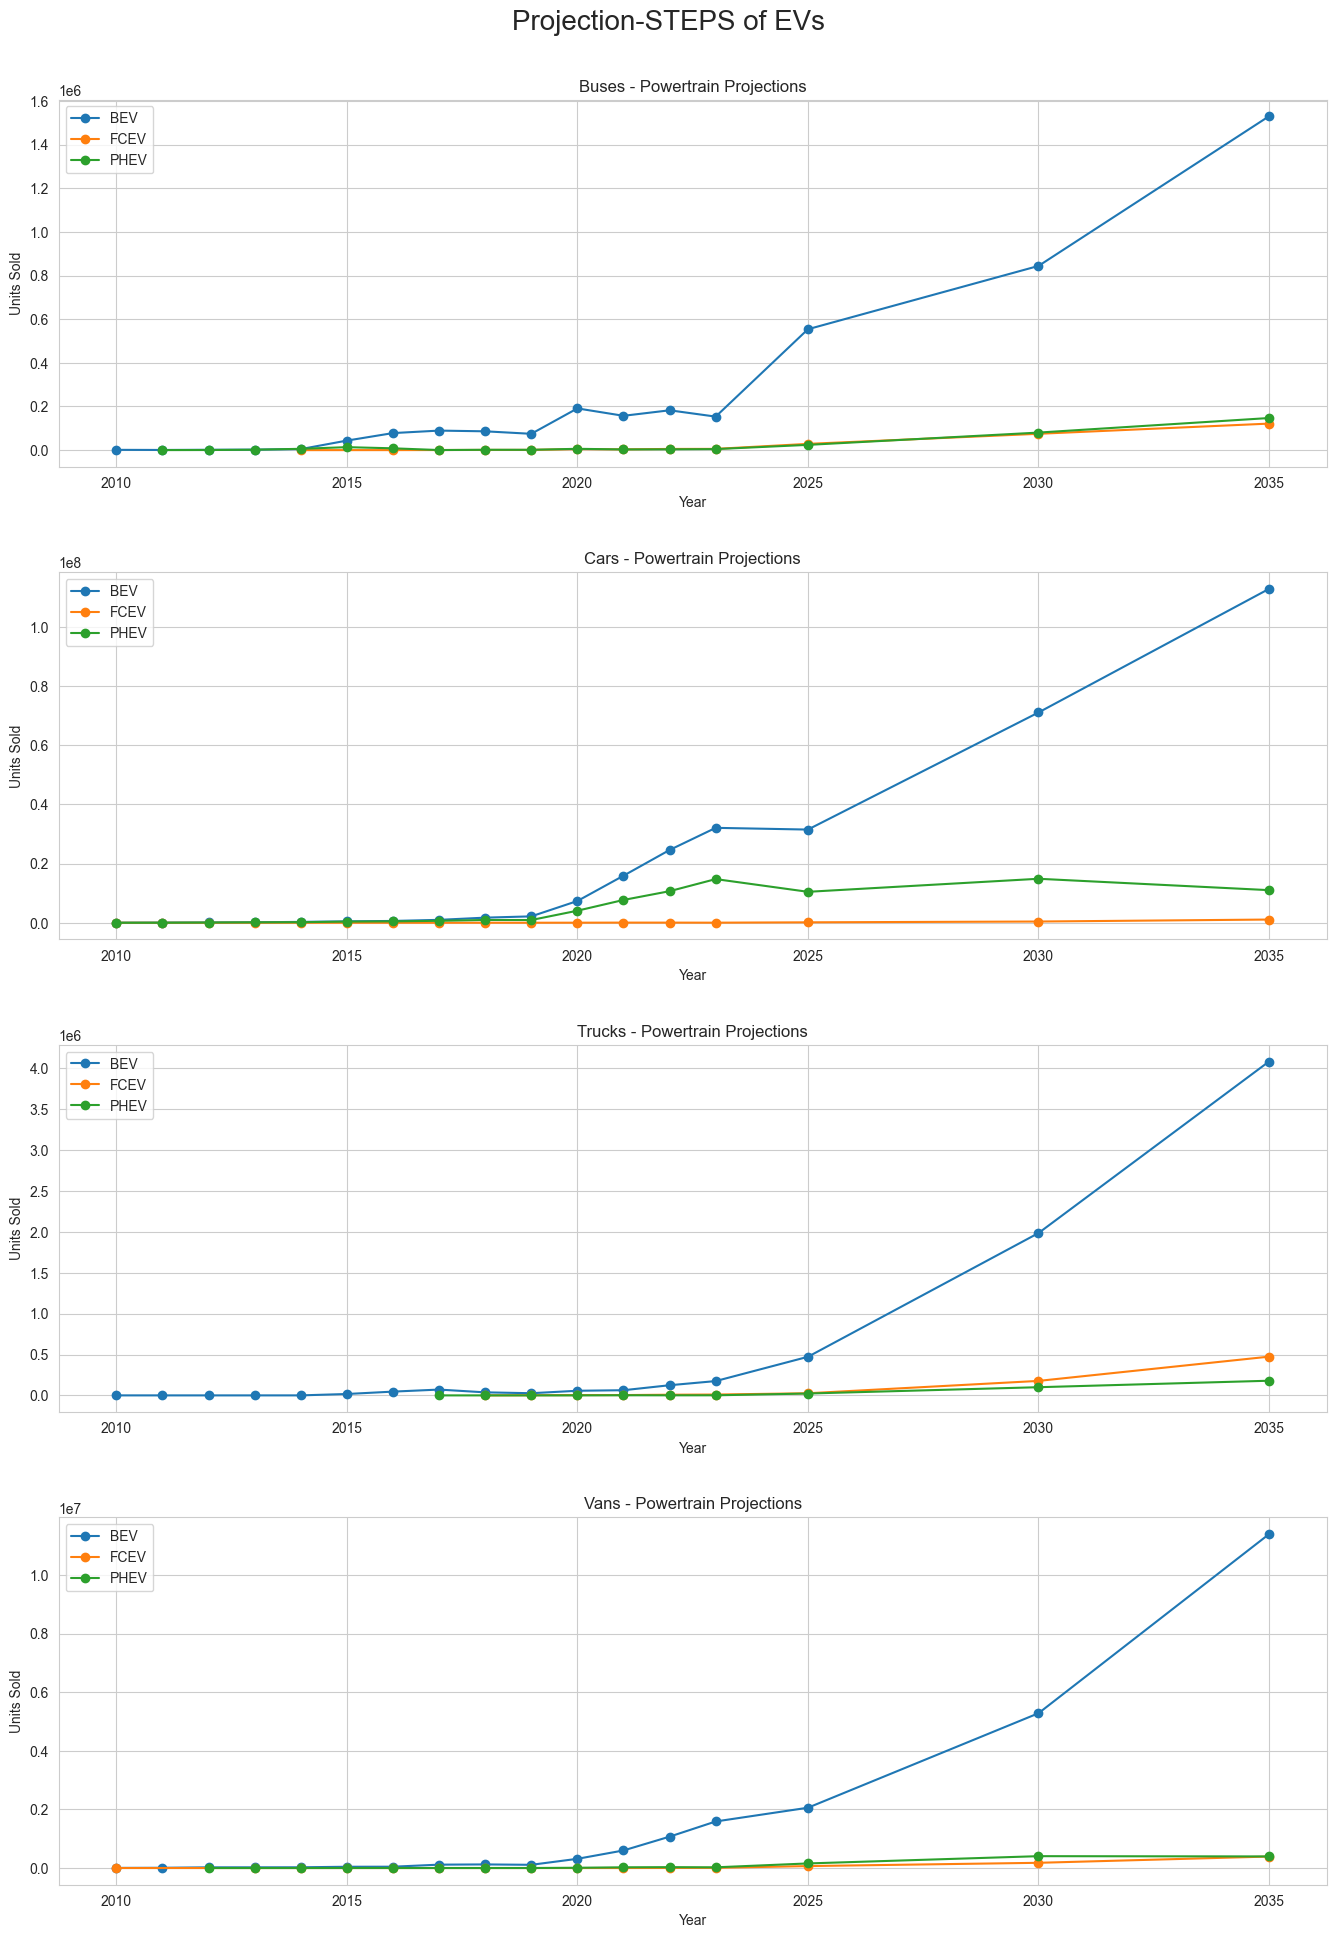

In [155]:
#Projection-STEPS of EVs

modes = POE['mode'].unique()

fig, axes = plt.subplots(nrows=len(modes), figsize=(14, 5 * len(modes)))
fig.suptitle('Projection-STEPS of EVs', fontsize=20)
if len(modes) == 1:
    axes = [axes]
print(axes)
for ax,mode in zip(axes,modes):
    mode_data = POE[POE['mode'] == mode]
    
    for powertrain in mode_data['powertrain'].unique():
        pt_data = mode_data[mode_data['powertrain'] == powertrain]
        ax.plot(pt_data['year'], pt_data['value'], marker='o', label=powertrain)

    ax.set_title(f'{mode} - Powertrain Projections')
    ax.set_xlabel('Year')
    ax.set_ylabel('Units Sold')
    ax.legend()
    ax.grid(True)

plt.tight_layout(pad=3)
file_path = os.path.join(figures_folder_path, 'Projection of sales by powertrain.png')
plt.savefig(file_path)

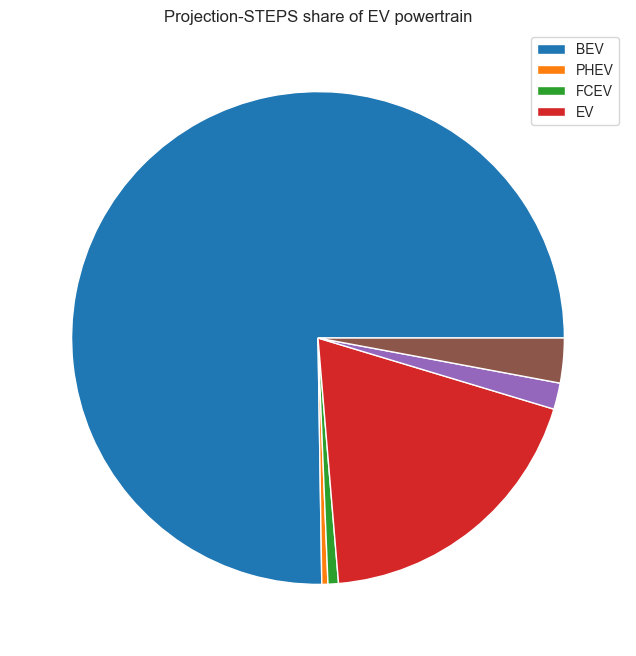

In [156]:
# Share of projection-APS of EVs
plotdata=SPOE['value'].plot(kind='pie', labels=None, figsize=(12,8))
plt.ylabel(None)
plt.title('Projection-STEPS share of EV powertrain')
labels=['BEV', 'PHEV', 'FCEV', 'EV']
plt.legend(loc='best', labels=labels)
file_path = os.path.join(figures_folder_path, 'Projection of share of powertrains.png')
plt.savefig(file_path)

##### Under Stated Policies (STEPS), BEV sales are projected to quadruple by 2030.

PHEVs will remain relevant but with slower growth.

EV adoption is expected to become mainstream across most regions.

Takeaway: Even conservative projections show strong EV adoption momentum.

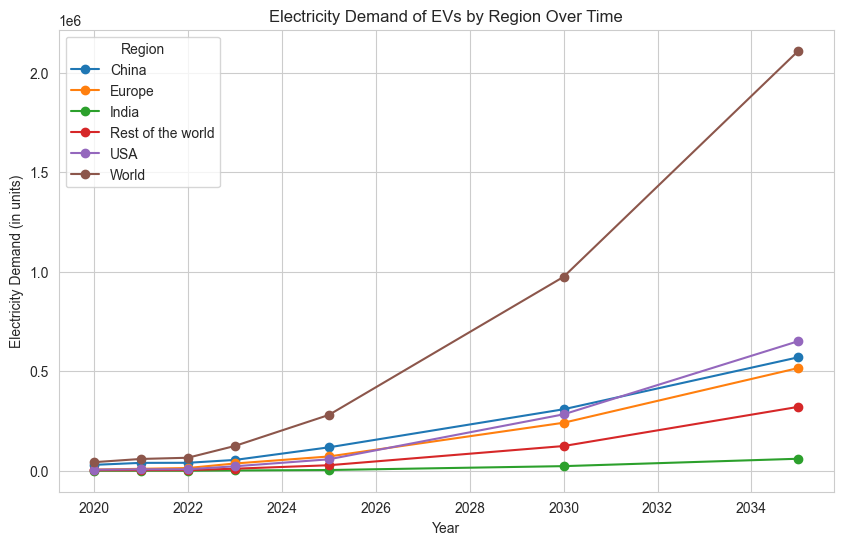

In [157]:
#Projection of Global Electricity demand of EVs
regions=POED['region'].unique()
plotdata=POED.reset_index().pivot(index='year',values='value',columns='region')
plt.figure(figsize=(10, 6))
for region in plotdata.columns:
    plt.plot(plotdata.index, plotdata[region], label=region, marker='o')

plt.title('Electricity Demand of EVs by Region Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Demand (in units)')
plt.legend(title="Region")
plt.grid(True)
file_path = os.path.join(figures_folder_path, 'Electricity demand of EVs region over time.png')
plt.savefig(file_path)

##### EV electricity demand will grow significantly post-2025.

By 2030, electricity demand for EVs could exceed 1000 TWh globally.

China, Europe, and the US will account for the majority of demand.

Takeaway: EV adoption has direct implications for energy infrastructure and grid capacity.

### KPIs

In [158]:
# Global EV sales in 2011 and 2023
ev_sales = df[(df['parameter'] == 'EV sales') & (df['unit'] == 'Vehicles')]

global_sales = ev_sales.groupby('year')['value'].sum()

sales_2011 = global_sales.loc[2011] if 2011 in global_sales.index else np.nan
sales_2023 = global_sales.loc[2023] if 2023 in global_sales.index else np.nan

print(f"Global EV sales in 2011: {sales_2011:,.0f} vehicles")
print(f"Global EV sales in 2023: {sales_2023:,.0f} vehicles (latest)")

report_path = os.path.join(reports_folder_path, "Global EV sales in 2011 and 2023.txt")
with open(report_path, "w") as f:
    f.write(f"Global EV sales in 2011: {sales_2011:,.0f} vehicles")
    f.write('\n')
    f.write(f"Global EV sales in 2023: {sales_2023:,.0f} vehicles (latest)")

Global EV sales in 2011: 130,608 vehicles
Global EV sales in 2023: 92,012,445 vehicles (latest)


In [159]:
# CAGR (Compound Annual Growth Rate) 2011–2023
years = 12 #(2023-2011 = 12 years)
if not np.isnan(sales_2011) and sales_2011 > 0:
    cagr = ((sales_2023 / sales_2011) ** (1/years) - 1) * 100
else:
    cagr = np.nan

print(f"CAGR (2011–2023): {cagr:.2f}%")

report_path = os.path.join(reports_folder_path, "CAGR 2011-2013.txt")
with open(report_path, "w") as f:
    f.write(f"CAGR (2011–2023): {cagr:.2f}%")

CAGR (2011–2023): 72.71%


In [160]:
# Market share by region in 2023
sales_2023_region = ev_sales[ev_sales['year'] == 2023].groupby('region')['value'].sum()
total_2023_sales = sales_2023_region.sum()
region_share = (sales_2023_region / total_2023_sales * 100).sort_values(ascending=False)

print("\nRegional market share in 2023 (%):")
print(region_share.head(10))
kpi="Regional market share in 2023 (%): "

report_path = os.path.join(reports_folder_path, "Market share by region in 2023.txt")
with open(report_path, "w") as f:
    f.write(kpi)
    f.write('\n\n')
    f.write((region_share.head(10)).to_string())


Regional market share in 2023 (%):
region
World                46.903416
China                27.438593
Europe               11.323485
USA                   4.544222
EU27                  2.800485
Rest of the world     2.241259
Germany               0.792032
France                0.548288
United Kingdom        0.516102
India                 0.276882
Name: value, dtype: float64


In [161]:
# BEV share of global EV stock in 2023
ev_stock = df[(df['parameter'] == 'EV stock') & (df['unit'] == 'Vehicles')]
bev_stock_2023 = ev_stock[(ev_stock['year'] == 2023) & (ev_stock['powertrain'] == 'BEV')]['value'].sum()
total_stock_2023 = ev_stock[ev_stock['year'] == 2023]['value'].sum()

bev_share = (bev_stock_2023 / total_stock_2023 * 100) if total_stock_2023 > 0 else np.nan
print(f"\nBEV share of global EV stock in 2023: {bev_share:.2f}%")
kpi=f"\nBEV share of global EV stock in 2023: {bev_share:.2f}%"
report_path = os.path.join(reports_folder_path, "BEV share of global EV stock in 2023.txt")
with open(report_path, "w") as f:
    f.write(kpi)


BEV share of global EV stock in 2023: 70.32%


In [162]:
# Projected global EV sales in 2030 (STEPS scenario)
proj_sales = df[
    (df['category'] == 'Projection-STEPS') &
    (df['parameter'] == 'EV sales') &
    (df['unit'] == 'Vehicles')
]
sales_2030 = proj_sales.groupby('year')['value'].sum().get(2030, np.nan)

print(f"\nProjected global EV sales in 2030 (STEPS): {sales_2030:,.0f} vehicles")
kpi = f"\nProjected global EV sales in 2030 (STEPS): {sales_2030:,.0f} vehicles"

report_path = os.path.join(reports_folder_path, "Projected global EV sales in 2030 (STEPS scenario).txt")
with open(report_path, "w") as f:
    f.write(kpi)


Projected global EV sales in 2030 (STEPS): 89,978,960 vehicles


In [167]:
# Combined KPI summary table
kpi_summary = {
    "Global EV sales in 2011": f"{sales_2011:,.0f}",
    "Global EV sales in 2023": f"{sales_2023:,.0f}",
    "CAGR (2011–2023)": f"{cagr:.2f}%",
    "China Market Share (2023)": f"{region_share.get('China', np.nan):.2f}%",
    "BEV share of global EV stock (2023)": f"{bev_share:.2f}%",
    "Projected global EV sales in 2030 (STEPS)": f"{sales_2030:,.0f}"
}

kpi_df = pd.DataFrame.from_dict(kpi_summary, orient='index', columns=['Value'])

report_path = os.path.join(reports_folder_path, "Combined KPI summary table.txt")
with open(report_path, "w") as f:
    f.write(kpi_df.to_string())

kpi_df


,Value
Global EV sales in 2011,"130,608"
Global EV sales in 2023,"92,012,445"
CAGR (2011–2023),72.71%
China Market Share (2023),27.44%
BEV share of global EV stock (2023),70.32%
Projected global EV sales in 2030 (STEPS),"89,978,960"
